# HOMELLC ASSIGNMENT PART :- 2 

## Data Visualization & Modeling part 

 Q. Find publicly available data for key factors that influence US home prices nationally. Then,
build a data science model that explains how these factors impacted home prices over the last 20
years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices:
fred.stlouisfed.org/series/CSUSHPISA.

Here we use the dataset Name= ["home_llc_dataset.csv"] that we have prepared in part one. 

The dataset contain 14 columns name as 

1]CSUSHPISA = 'CSUSHPISA' this column is our label data column which is  S&P Case-Schiller Home Price Index as a proxy for home prices

2]Year = This column represent the year

3]Month = This column represent the month 

4]Per_Capita_GDP = This column represent the per capita gdp of U.S. 

5]Working_Population = This column represent the total working population in U.S. which is under 65 age 

6]Houses =  This column represent Monthly supply of new house Data in U.S.

7]CPI = This column represent consumer price index in U.S.

8]UNRATE = This column represent Unemployment Rate in U.S. 

9]Con_Materials = This column represent construction material cost in U.S. 

10]FEDFUNDS = This column represent year by year  interest rate of the U.S. 

11]Num_Households = This column represent Number of households Data in U.S. 

12]Income = This column represent Real Median Household Income data in U.S. 

13]Subsidy = This column represent Housing Subsidies Data  provided by U.S.   

14]old_percent = This column represent Population above age 65 Data in U.S. 


# Importing Libraries

In [110]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [111]:
#Importing prepared csv file 
df = pd.read_csv("home_llc_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Con_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
DATE,,,,,,,,,,,,,,
2004-01-01,141.646,2004,1,52179.000000,187688839.5,3.8,186.3,5.7,150.0,1.00,112000,65760.0,27.201,12.304719
2004-01-02,143.192,2004,1,52275.666667,187876003.0,3.7,186.7,5.6,153.4,1.01,112000,65760.0,27.201,12.304719
2004-01-03,145.059,2004,1,52372.333333,188058175.6,3.6,187.1,5.8,156.5,1.00,112000,65760.0,27.201,12.304719
2004-01-04,146.593,2004,1,52469.000000,188320660.9,4.0,187.4,5.6,160.1,1.00,112000,65760.0,27.201,12.304719
2004-01-05,148.186,2004,1,52591.000000,188475226.1,3.8,188.2,5.6,162.7,1.00,112000,65760.0,27.201,12.304719


In [112]:
df.shape

(228, 14)

The dataset has 228 rows and 14 columns 

In [113]:
df.head(10)

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Con_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
DATE,,,,,,,,,,,,,,
2004-01-01,141.646,2004,1,52179.000000,187688839.5,3.8,186.3,5.7,150.0,1.00,112000,65760.0,27.201,12.304719
2004-01-02,143.192,2004,1,52275.666667,187876003.0,3.7,186.7,5.6,153.4,1.01,112000,65760.0,27.201,12.304719
2004-01-03,145.059,2004,1,52372.333333,188058175.6,3.6,187.1,5.8,156.5,1.00,112000,65760.0,27.201,12.304719
2004-01-04,146.593,2004,1,52469.000000,188320660.9,4.0,187.4,5.6,160.1,1.00,112000,65760.0,27.201,12.304719
2004-01-05,148.186,2004,1,52591.000000,188475226.1,3.8,188.2,5.6,162.7,1.00,112000,65760.0,27.201,12.304719
2004-01-06,149.850,2004,1,52713.000000,188689296.3,3.9,188.9,5.6,162.0,1.03,112000,65760.0,27.201,12.304719
2004-01-07,151.338,2004,1,52835.000000,188839779.7,4.5,189.1,5.5,162.2,1.26,112000,65760.0,27.201,12.304719
2004-01-08,152.633,2004,1,52970.666667,189070874.2,4.3,189.2,5.4,165.9,1.43,112000,65760.0,27.201,12.304719
2004-01-09,154.179,2004,1,53106.333333,189216972.4,4.1,189.8,5.4,167.2,1.61,112000,65760.0,27.201,12.304719


Top 10 rows of the dataset.

In [114]:
df.tail(10)

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Con_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
DATE,,,,,,,,,,,,,,
2022-01-03,296.445,2022,1,65180.000000,207013003.7,7.0,287.472,3.6,345.852,0.20,131202,74580.0,48.021,17.128121
2022-01-04,300.573,2022,1,65127.000000,207064955.4,8.5,288.611,3.6,343.786,0.33,131202,74580.0,48.021,17.128121
2022-01-05,303.762,2022,1,65238.666667,207270515.8,8.3,291.268,3.6,353.015,0.77,131202,74580.0,48.021,17.128121
2022-01-06,304.724,2022,1,65350.333333,207394728.3,9.5,294.728,3.6,349.800,1.21,131202,74580.0,48.021,17.128121
2022-01-07,303.879,2022,1,65462.000000,207407819.6,10.1,294.628,3.5,346.790,1.68,131202,74580.0,48.021,17.128121
2022-01-08,301.473,2022,1,65569.000000,207370651.0,8.7,295.320,3.7,342.753,2.33,131202,74580.0,48.021,17.128121
2022-01-09,299.353,2022,1,65676.000000,207453580.5,9.7,296.539,3.5,336.464,2.56,131202,74580.0,48.021,17.128121
2022-01-10,298.873,2022,1,65783.000000,207431164.7,9.7,297.987,3.7,333.796,3.08,131202,74580.0,48.021,17.128121
2022-01-11,298.269,2022,1,65881.333333,207521914.2,9.4,298.598,3.6,330.369,3.78,131202,74580.0,48.021,17.128121


Last 10 rows of the dataset.

# Exploratory Data Analysis [EDA]

In [115]:
df.columns.to_list()

['CSUSHPISA',
 'Year',
 'Month',
 'Per_Capita_GDP',
 'Working_Population',
 'Houses',
 'CPI',
 'UNRATE',
 'Con_Materials',
 'FEDFUNDS',
 'Num_Households',
 'Income',
 'Subsidy',
 'old_percent']

List of all the columns present in the datset.

In [116]:
df.dtypes

CSUSHPISA             float64
Year                    int64
Month                   int64
Per_Capita_GDP        float64
Working_Population    float64
Houses                float64
CPI                   float64
UNRATE                float64
Con_Materials         float64
FEDFUNDS              float64
Num_Households          int64
Income                float64
Subsidy               float64
old_percent           float64
dtype: object

Data type of all the columns present in the dataset.The dataset consists of a combination of 'float64' and 'int64' data types, indicating the prevalence of numeric values throughout the dataset.

# Checking For Duplicate Values

In [117]:
df.duplicated().sum()

0

We can see here that there are no duplicate values present in the dataset

# Checking for White space

In [118]:
# Check for white spaces
has_white_spaces = ' ' in df
print(has_white_spaces)

False


We can see here that there are no white space present in the dataset

# Checking For Null Values

In [119]:
df.isnull().sum()

CSUSHPISA             0
Year                  0
Month                 0
Per_Capita_GDP        0
Working_Population    0
Houses                0
CPI                   0
UNRATE                0
Con_Materials         0
FEDFUNDS              0
Num_Households        0
Income                0
Subsidy               0
old_percent           0
dtype: int64

There are no null values present in the dataset.

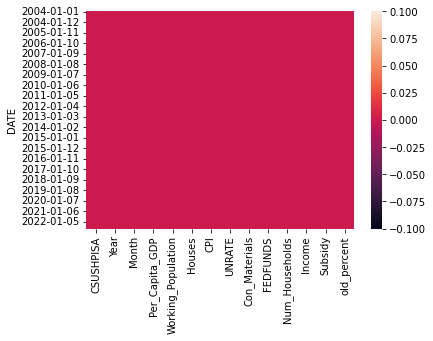

In [120]:
#By using heatmap
sns.heatmap(df.isnull())
plt.show()

By visualization with heatmap we can also see that there are no null values present in the dataset

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 2004-01-01 to 2022-01-12
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CSUSHPISA           228 non-null    float64
 1   Year                228 non-null    int64  
 2   Month               228 non-null    int64  
 3   Per_Capita_GDP      228 non-null    float64
 4   Working_Population  228 non-null    float64
 5   Houses              228 non-null    float64
 6   CPI                 228 non-null    float64
 7   UNRATE              228 non-null    float64
 8   Con_Materials       228 non-null    float64
 9   FEDFUNDS            228 non-null    float64
 10  Num_Households      228 non-null    int64  
 11  Income              228 non-null    float64
 12  Subsidy             228 non-null    float64
 13  old_percent         228 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 26.7+ KB


Here we can get a general information about the dataset that our dataset has 14 columns, 228 non null values which shows there are no null value present in the data, total memeory occuired by the dataset is 26.7 kb

# Droping Unnecessary Columns From The Dataset.

In [122]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

We don't need the 'Month' and 'Year' columns for our analysis. So, we will drop those columns

In [123]:
df.shape

(228, 12)

In [124]:
df

,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Con_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
DATE,,,,,,,,,,,,
2004-01-01,141.646,52179.000000,187688839.5,3.8,186.300,5.7,150.000,1.00,112000,65760.0,27.201,12.304719
2004-01-02,143.192,52275.666667,187876003.0,3.7,186.700,5.6,153.400,1.01,112000,65760.0,27.201,12.304719
2004-01-03,145.059,52372.333333,188058175.6,3.6,187.100,5.8,156.500,1.00,112000,65760.0,27.201,12.304719
2004-01-04,146.593,52469.000000,188320660.9,4.0,187.400,5.6,160.100,1.00,112000,65760.0,27.201,12.304719
2004-01-05,148.186,52591.000000,188475226.1,3.8,188.200,5.6,162.700,1.00,112000,65760.0,27.201,12.304719
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-08,301.473,65569.000000,207370651.0,8.7,295.320,3.7,342.753,2.33,131202,74580.0,48.021,17.128121
2022-01-09,299.353,65676.000000,207453580.5,9.7,296.539,3.5,336.464,2.56,131202,74580.0,48.021,17.128121
2022-01-10,298.873,65783.000000,207431164.7,9.7,297.987,3.7,333.796,3.08,131202,74580.0,48.021,17.128121


# Description Of Dataset

In [125]:
df.describe()

,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Con_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
count,228.000000,228.000000,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,183.127022,57706.026316,2.008466e+08,6.255263,232.445382,6.013158,216.311632,1.310789,121874.263158,69085.789474,35.137842,14.121979
std,40.848812,3821.383548,5.509411e+06,1.931815,26.016753,2.086817,43.017225,1.618934,5806.601889,4638.176745,5.807508,1.516730
min,136.533000,52179.000000,1.876888e+08,3.300000,186.300000,3.500000,150.000000,0.050000,112000.000000,63350.000000,27.201000,12.304719
25%,151.464750,54599.750000,1.969770e+08,4.975000,213.374250,4.500000,189.275000,0.117500,116783.000000,65740.000000,29.876000,12.670858
50%,174.617000,56212.333333,2.023396e+08,5.600000,232.918500,5.350000,209.200000,0.375000,122459.000000,67520.000000,33.806000,13.891076
75%,200.139000,60716.416667,2.056241e+08,7.300000,249.739500,7.525000,231.525000,2.062500,127586.000000,73030.000000,38.859000,15.397698
max,304.724000,65979.666667,2.075245e+08,12.200000,298.990000,14.700000,353.015000,5.260000,131202.000000,78250.000000,48.021000,17.128121


Observation:-

1] The count for all the rows are same so there is no null values present in the dataset.

2] There is a huge difference between 75th percentile and max value in columns so outliers are present in the dataset.

3] In columns ['Income','Subsidy','old_percent', 'UNRATE', 'Houses'] mean is greater than median so the data is skewed to the right side.

from above observation we can say that skewness and outliers are present in the dataset.

4] We can also observe mean value, std. value, min. value, 25th percentile,50 percentile,75th percentile max. value of the dataset.

5] There is no negative or invalid values present in the dataset.

# Check for correlation 

In [126]:
# Correlation
df.corr()

,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Con_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
CSUSHPISA,1.000000,0.889204,0.525400,0.054886,0.788721,-0.524812,0.881236,0.133636,0.695841,0.832626,0.815288,0.821179
Per_Capita_GDP,0.889204,1.000000,0.808732,-0.106596,0.930986,-0.503517,0.896284,-0.107949,0.918204,0.873145,0.911448,0.958107
Working_Population,0.525400,0.808732,1.000000,-0.072649,0.910700,-0.128990,0.737393,-0.458076,0.962062,0.605998,0.845249,0.872880
Houses,0.054886,-0.106596,-0.072649,1.000000,-0.014572,0.064696,0.084359,0.227703,-0.145034,-0.107461,-0.040354,-0.156389
CPI,0.788721,0.930986,0.910700,-0.014572,1.000000,-0.242068,0.937190,-0.342879,0.965749,0.722762,0.963792,0.968984
UNRATE,-0.524812,-0.503517,-0.128990,0.064696,-0.242068,1.000000,-0.287496,-0.514132,-0.259650,-0.504956,-0.166992,-0.298649
Con_Materials,0.881236,0.896284,0.737393,0.084359,0.937190,-0.287496,1.000000,-0.244405,0.839153,0.675462,0.920305,0.900637
FEDFUNDS,0.133636,-0.107949,-0.458076,0.227703,-0.342879,-0.514132,-0.244405,1.000000,-0.387043,0.086956,-0.348070,-0.319573
Num_Households,0.695841,0.918204,0.962062,-0.145034,0.965749,-0.259650,0.839153,-0.387043,1.000000,0.749333,0.930013,0.967482
Income,0.832626,0.873145,0.605998,-0.107461,0.722762,-0.504956,0.675462,0.086956,0.749333,1.000000,0.781453,0.830920


Here we can see that how the different different variable in the dataset is correlated with the label data  

# Data Visualization

## Univarient Analysis

MEAN Of CSUSHPISA 183.12702192982445
Max value of CSUSHPISA 304.724
Min value of CSUSHPISA 136.533


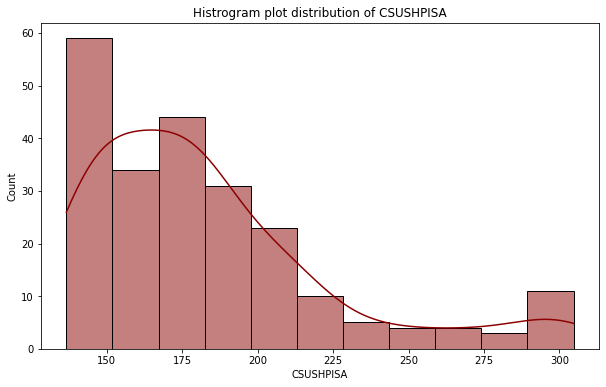

****************************************************************************************************
MEAN Of Per_Capita_GDP 57706.02631578947
Max value of Per_Capita_GDP 65979.66666666667
Min value of Per_Capita_GDP 52179.0


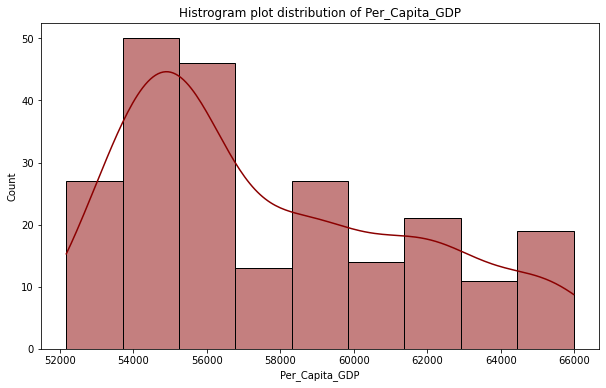

****************************************************************************************************
MEAN Of Working_Population 200846575.6600878
Max value of Working_Population 207524486.3
Min value of Working_Population 187688839.5


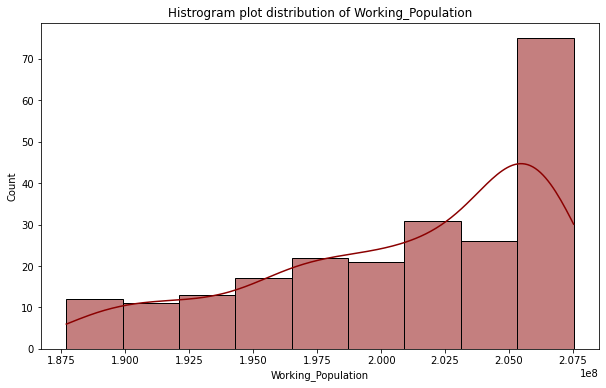

****************************************************************************************************
MEAN Of Houses 6.255263157894739
Max value of Houses 12.2
Min value of Houses 3.3


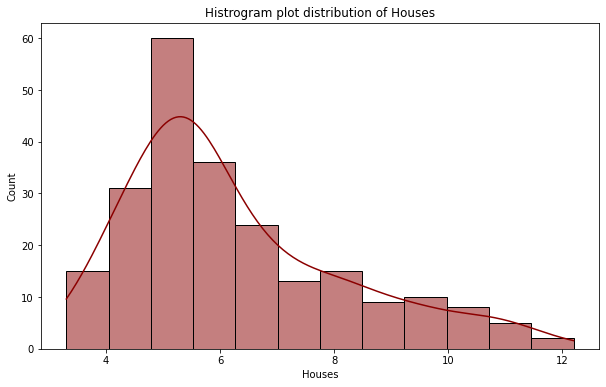

****************************************************************************************************
MEAN Of CPI 232.4453815789474
Max value of CPI 298.99
Min value of CPI 186.3


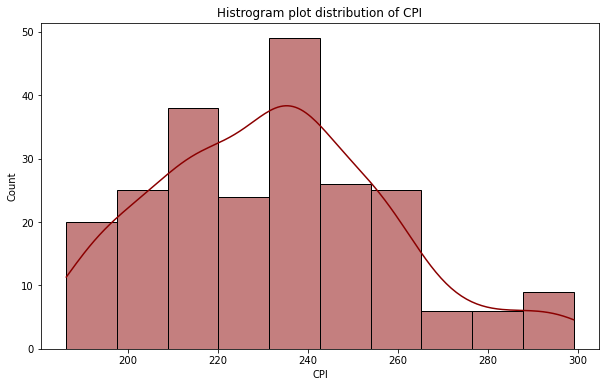

****************************************************************************************************
MEAN Of UNRATE 6.013157894736843
Max value of UNRATE 14.7
Min value of UNRATE 3.5


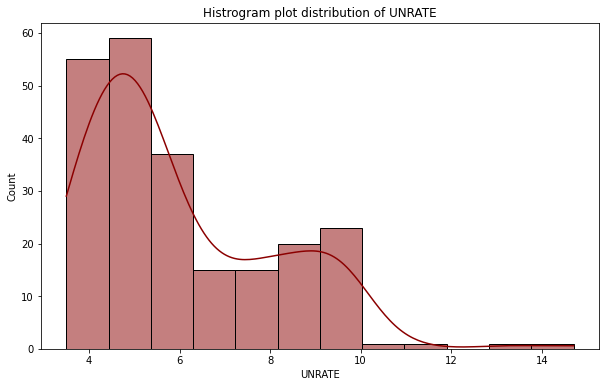

****************************************************************************************************
MEAN Of Con_Materials 216.3116315789475
Max value of Con_Materials 353.015
Min value of Con_Materials 150.0


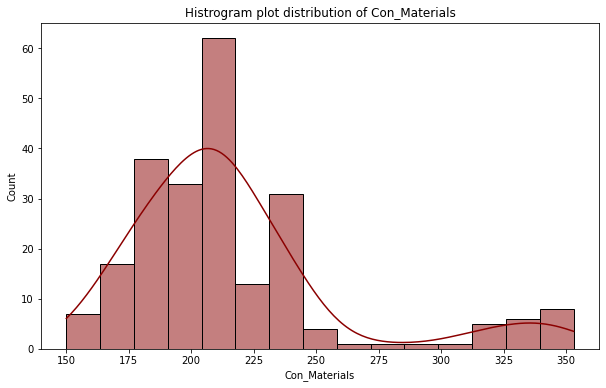

****************************************************************************************************
MEAN Of FEDFUNDS 1.310789473684209
Max value of FEDFUNDS 5.26
Min value of FEDFUNDS 0.05


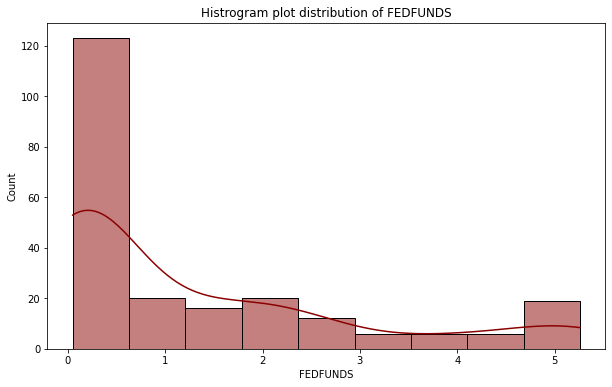

****************************************************************************************************
MEAN Of Num_Households 121874.26315789473
Max value of Num_Households 131202
Min value of Num_Households 112000


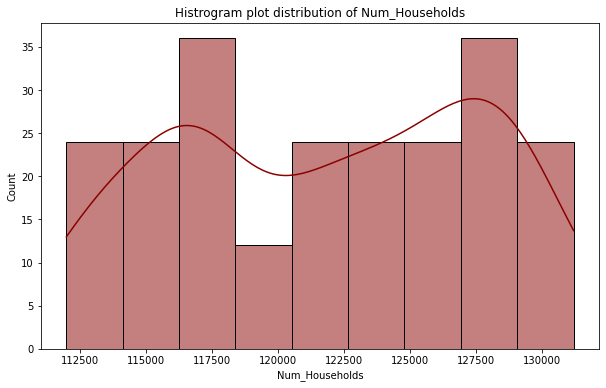

****************************************************************************************************
MEAN Of Income 69085.78947368421
Max value of Income 78250.0
Min value of Income 63350.0


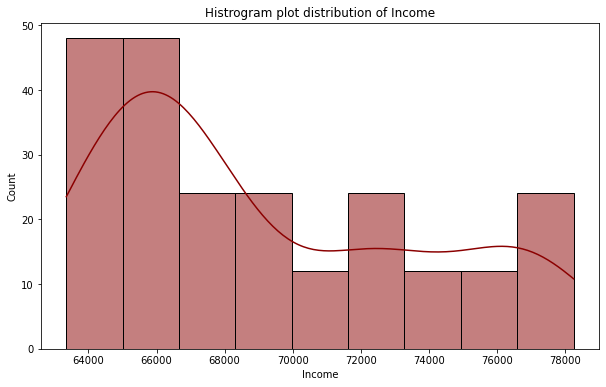

****************************************************************************************************
MEAN Of Subsidy 35.137842105263196
Max value of Subsidy 48.021
Min value of Subsidy 27.201


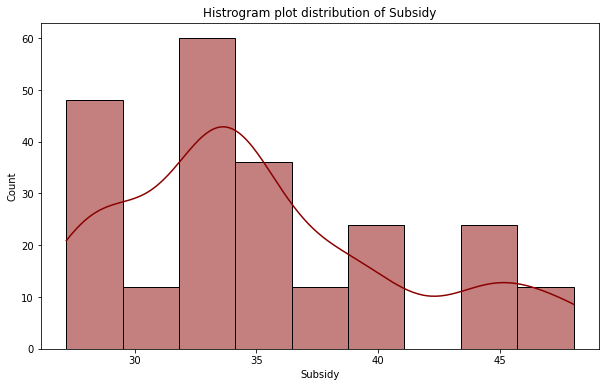

****************************************************************************************************
MEAN Of old_percent 14.121979107368407
Max value of old_percent 17.12812055
Min value of old_percent 12.30471923


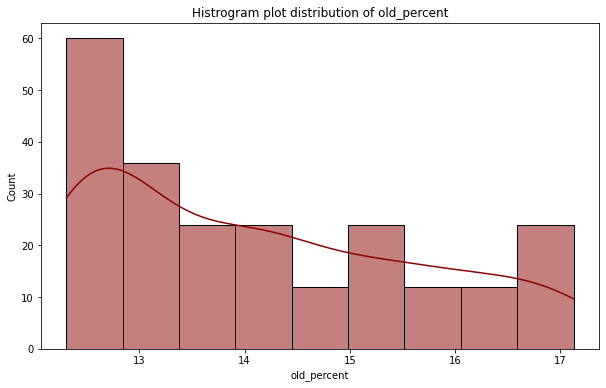

****************************************************************************************************


In [127]:
for i in df.columns:
    
    print("MEAN Of", i , df[i].mean())
    print("Max value of", i , df[i].max())
    print("Min value of", i , df[i].min())
    plt.figure(figsize=(10,6))
    sns.histplot(df[i], color='darkred', kde= True)
    plt.title(f"Histrogram plot distribution of {i}")
    plt.show()
    print('*' * 100)

Here we can observed the distribution of each column along with the mean[Avg.], Max., Min. value for each column present in the dataset. 

# Bivarient Analysis

In Bivarient Analysis we will use scatterplot graph to find out how different different data variables are correlated with our label data.

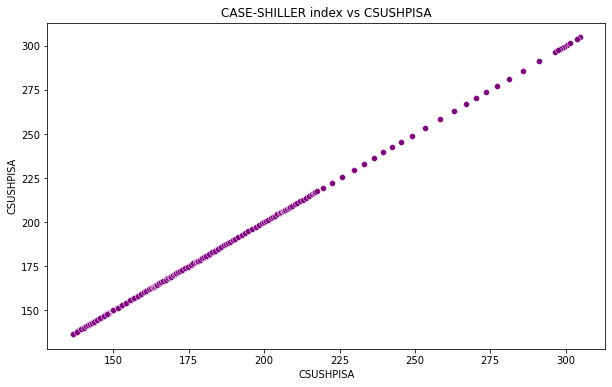

****************************************************************************************************


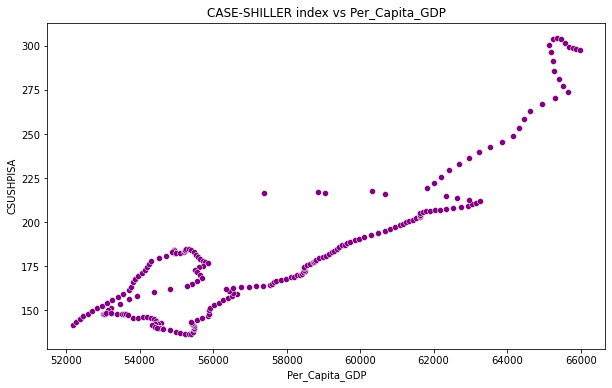

****************************************************************************************************


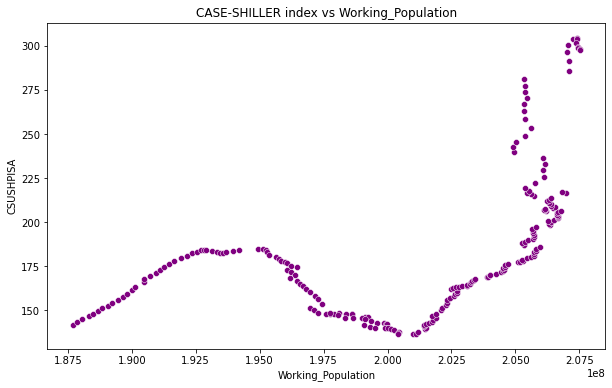

****************************************************************************************************


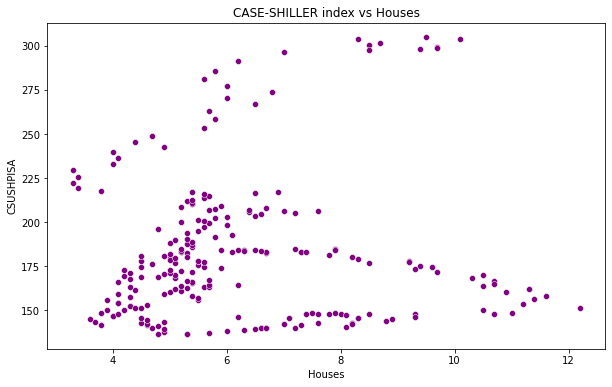

****************************************************************************************************


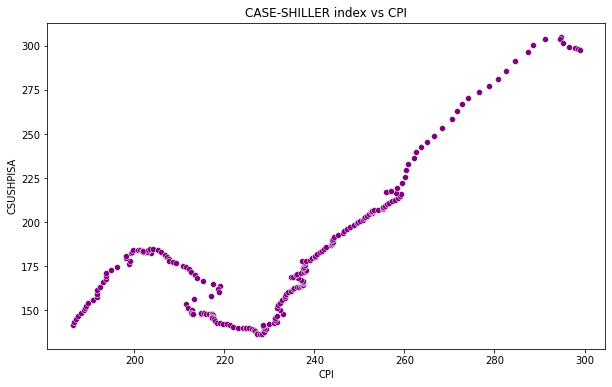

****************************************************************************************************


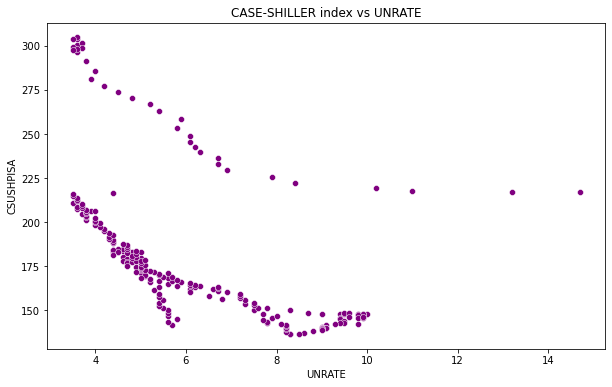

****************************************************************************************************


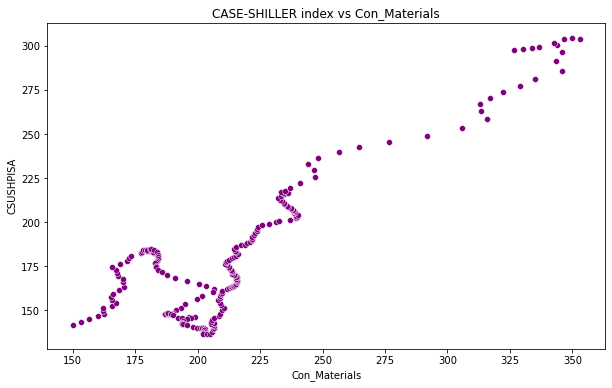

****************************************************************************************************


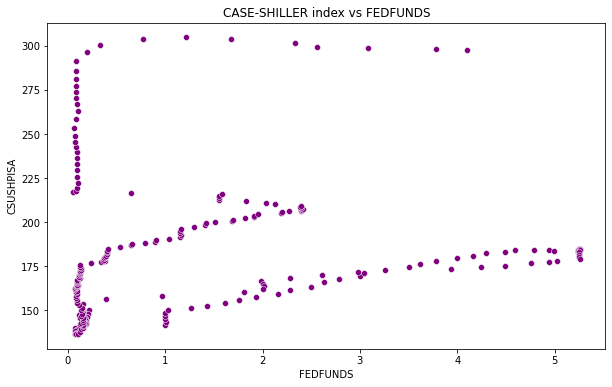

****************************************************************************************************


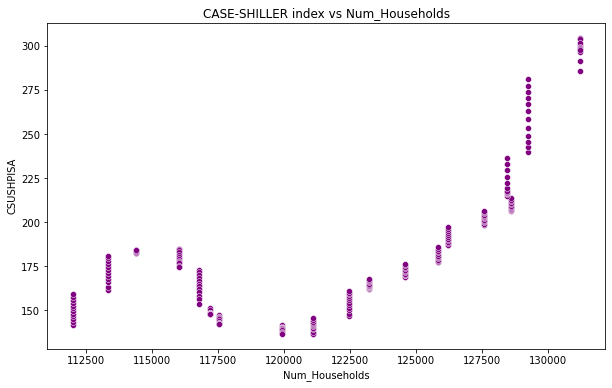

****************************************************************************************************


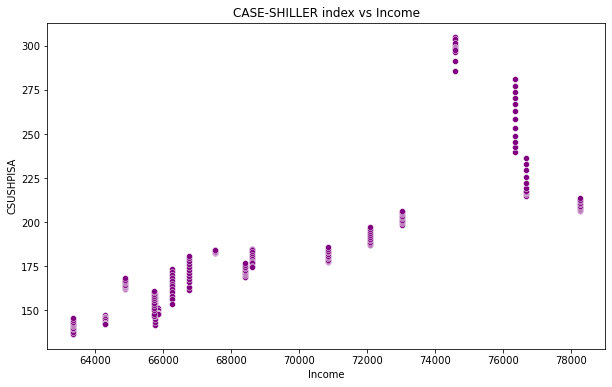

****************************************************************************************************


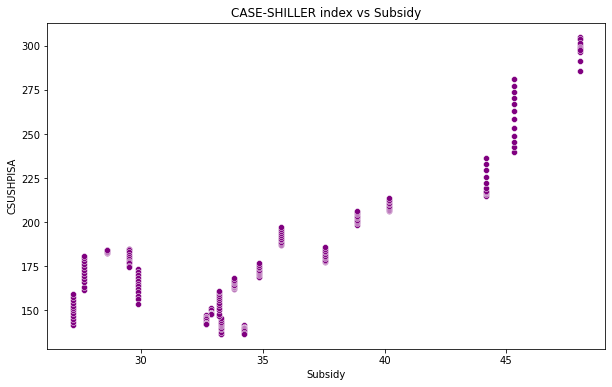

****************************************************************************************************


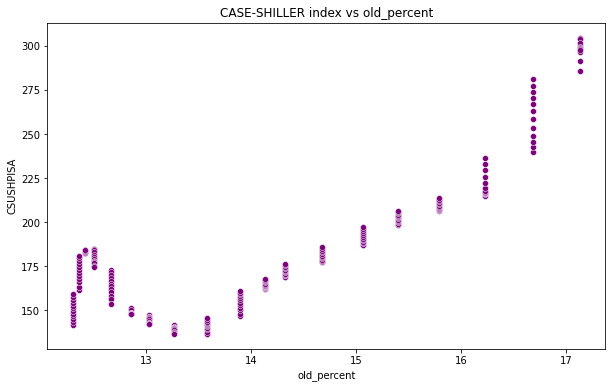

****************************************************************************************************


In [128]:
for i in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(df[i], df['CSUSHPISA'], color='purple')
    plt.title(f"CASE-SHILLER index vs {i}")
    plt.show()
    print('*' * 100)

The scatter plot visualizations revealed the following insights:

1] The unemployment rate exhibits a clear negative correlation with home prices, aligning with intuitive expectations.

2] Surprisingly, the number of new houses shows nearly zero correlation. This unexpected finding suggests that the quantity of newly constructed houses may not be sufficient to exert a significant downward pressure on home prices.

3] The impact of the great recession is evident across various plots, indicating its lasting effects on the housing market.

4] Interest rates demonstrate a subtle negative influence on home prices.

5] Consistently, all other variables exhibit positive correlations with home prices.

These observations provide valuable insights into the relationships between different factors and home prices, contributing to a more comprehensive understanding of the dataset.

## Multivarient Analysis 

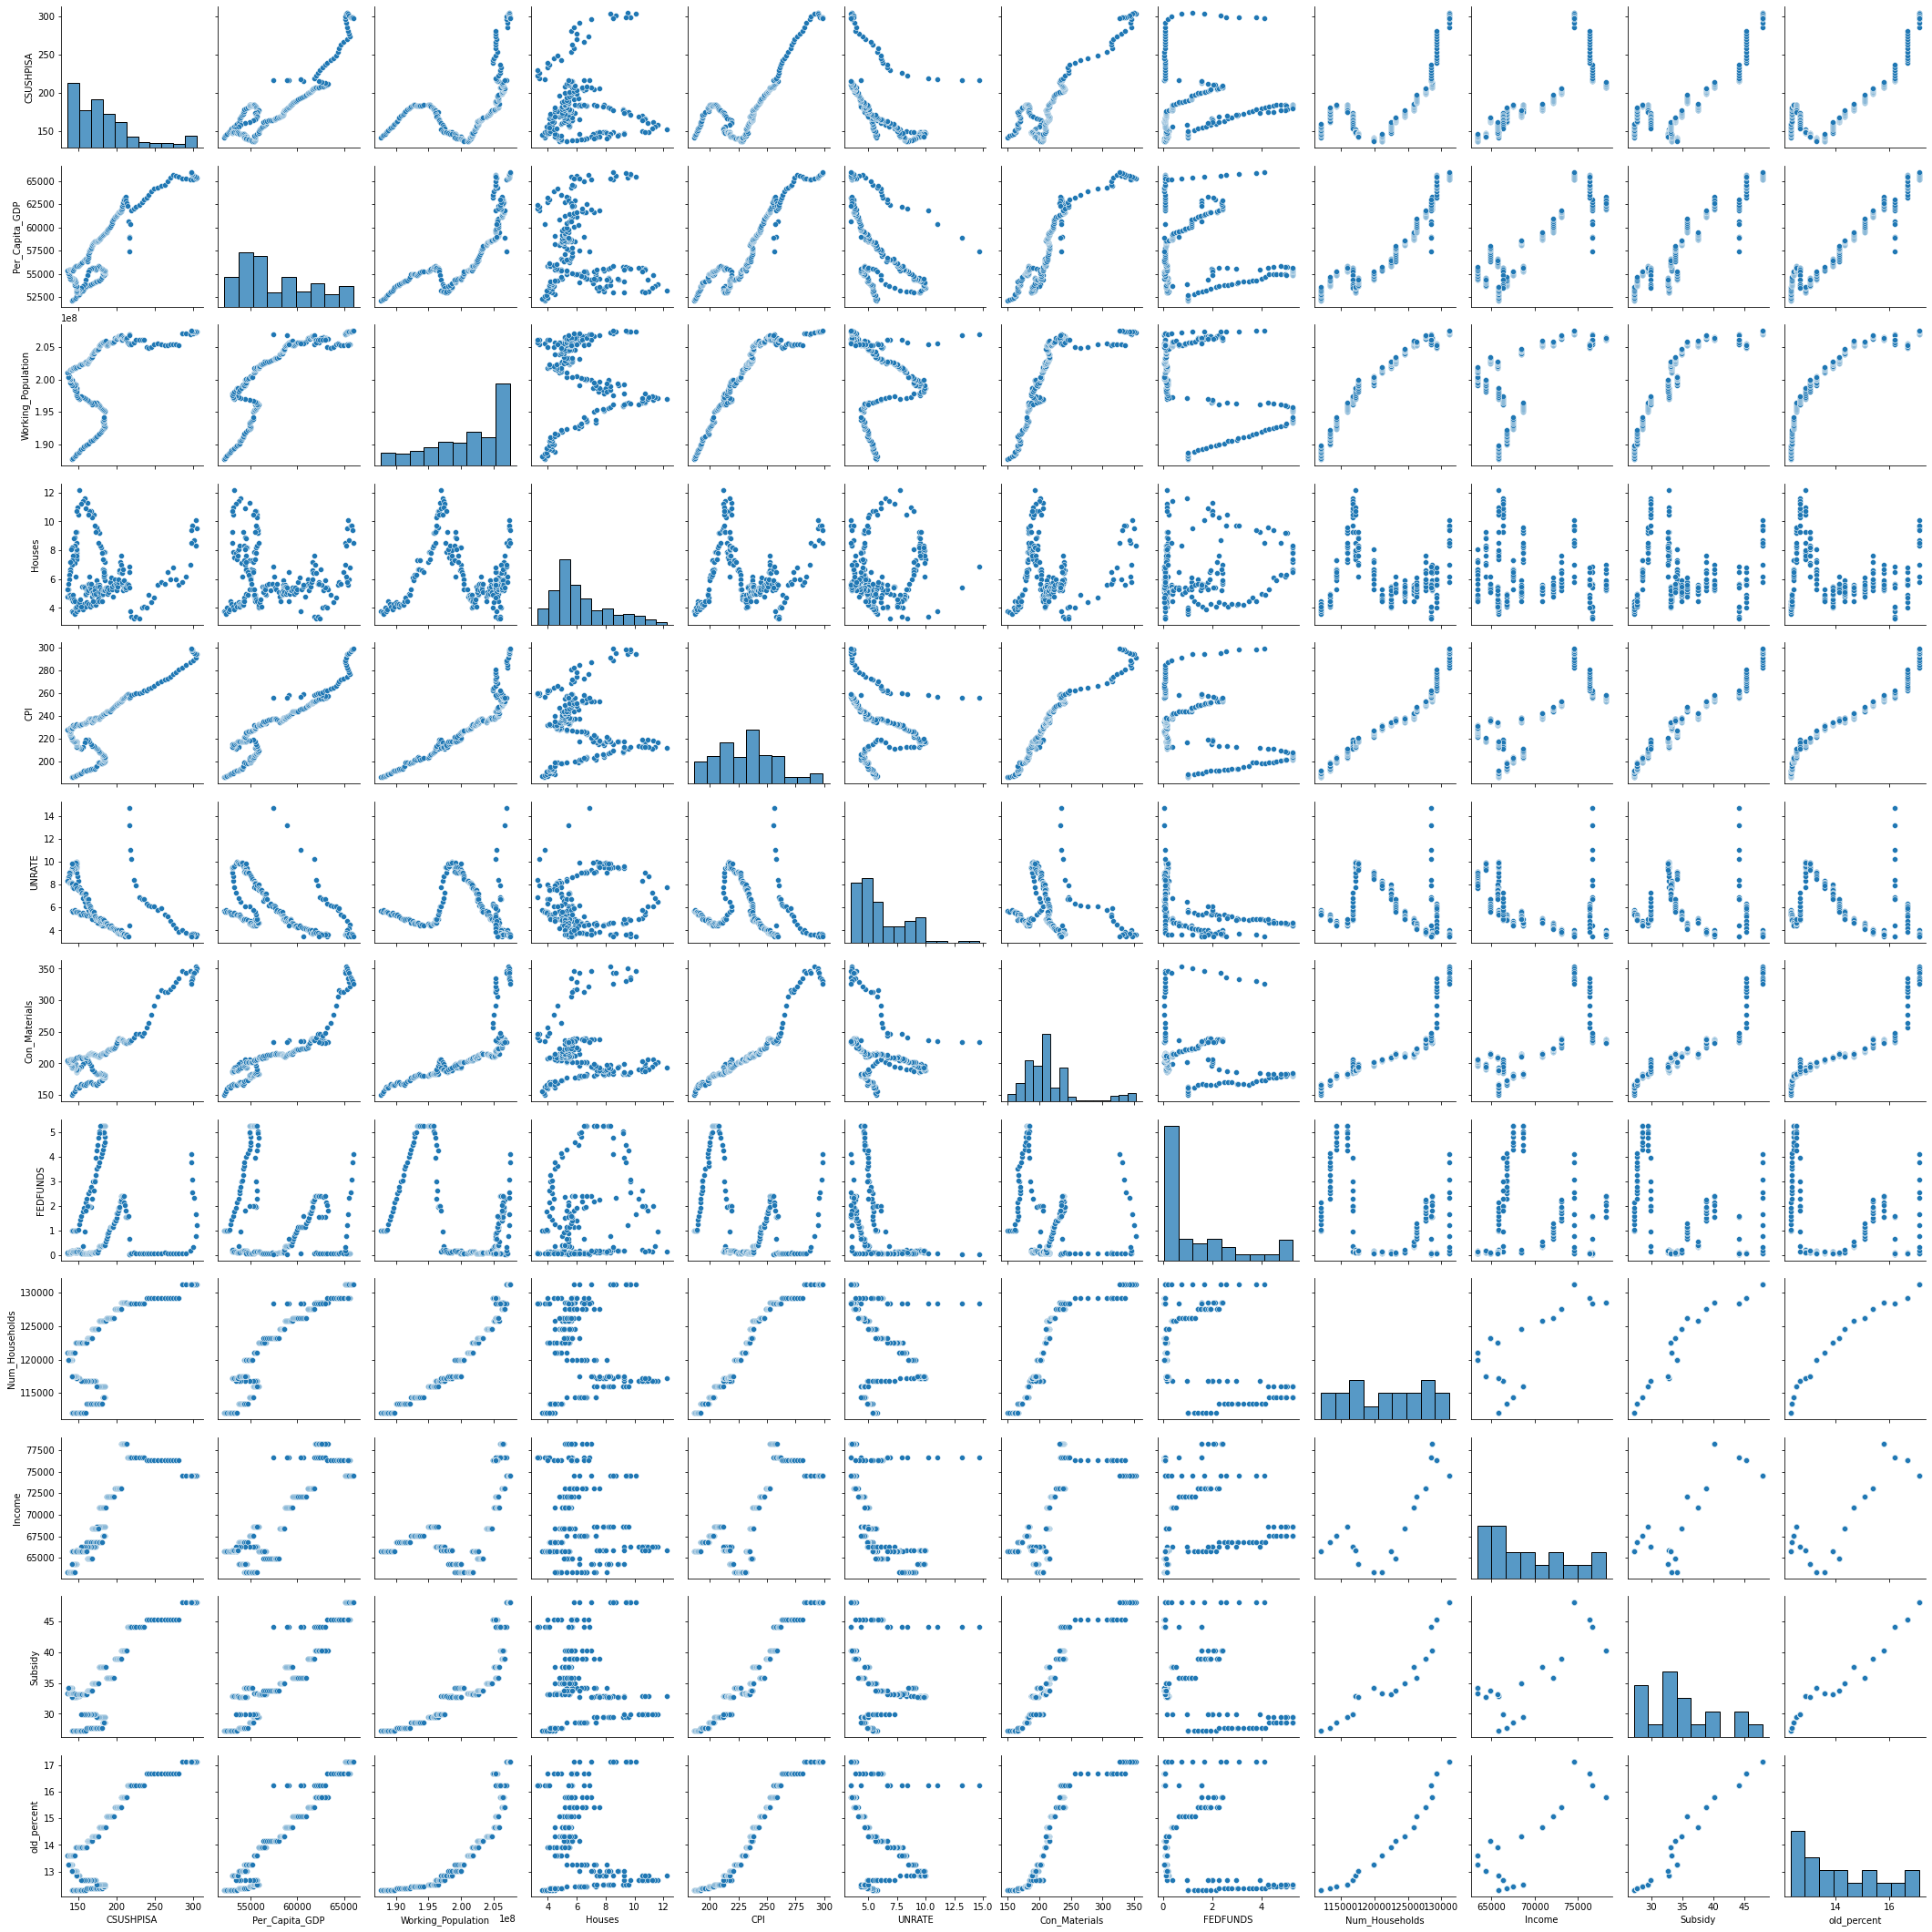

In [129]:
sns.pairplot(df)
plt.show()

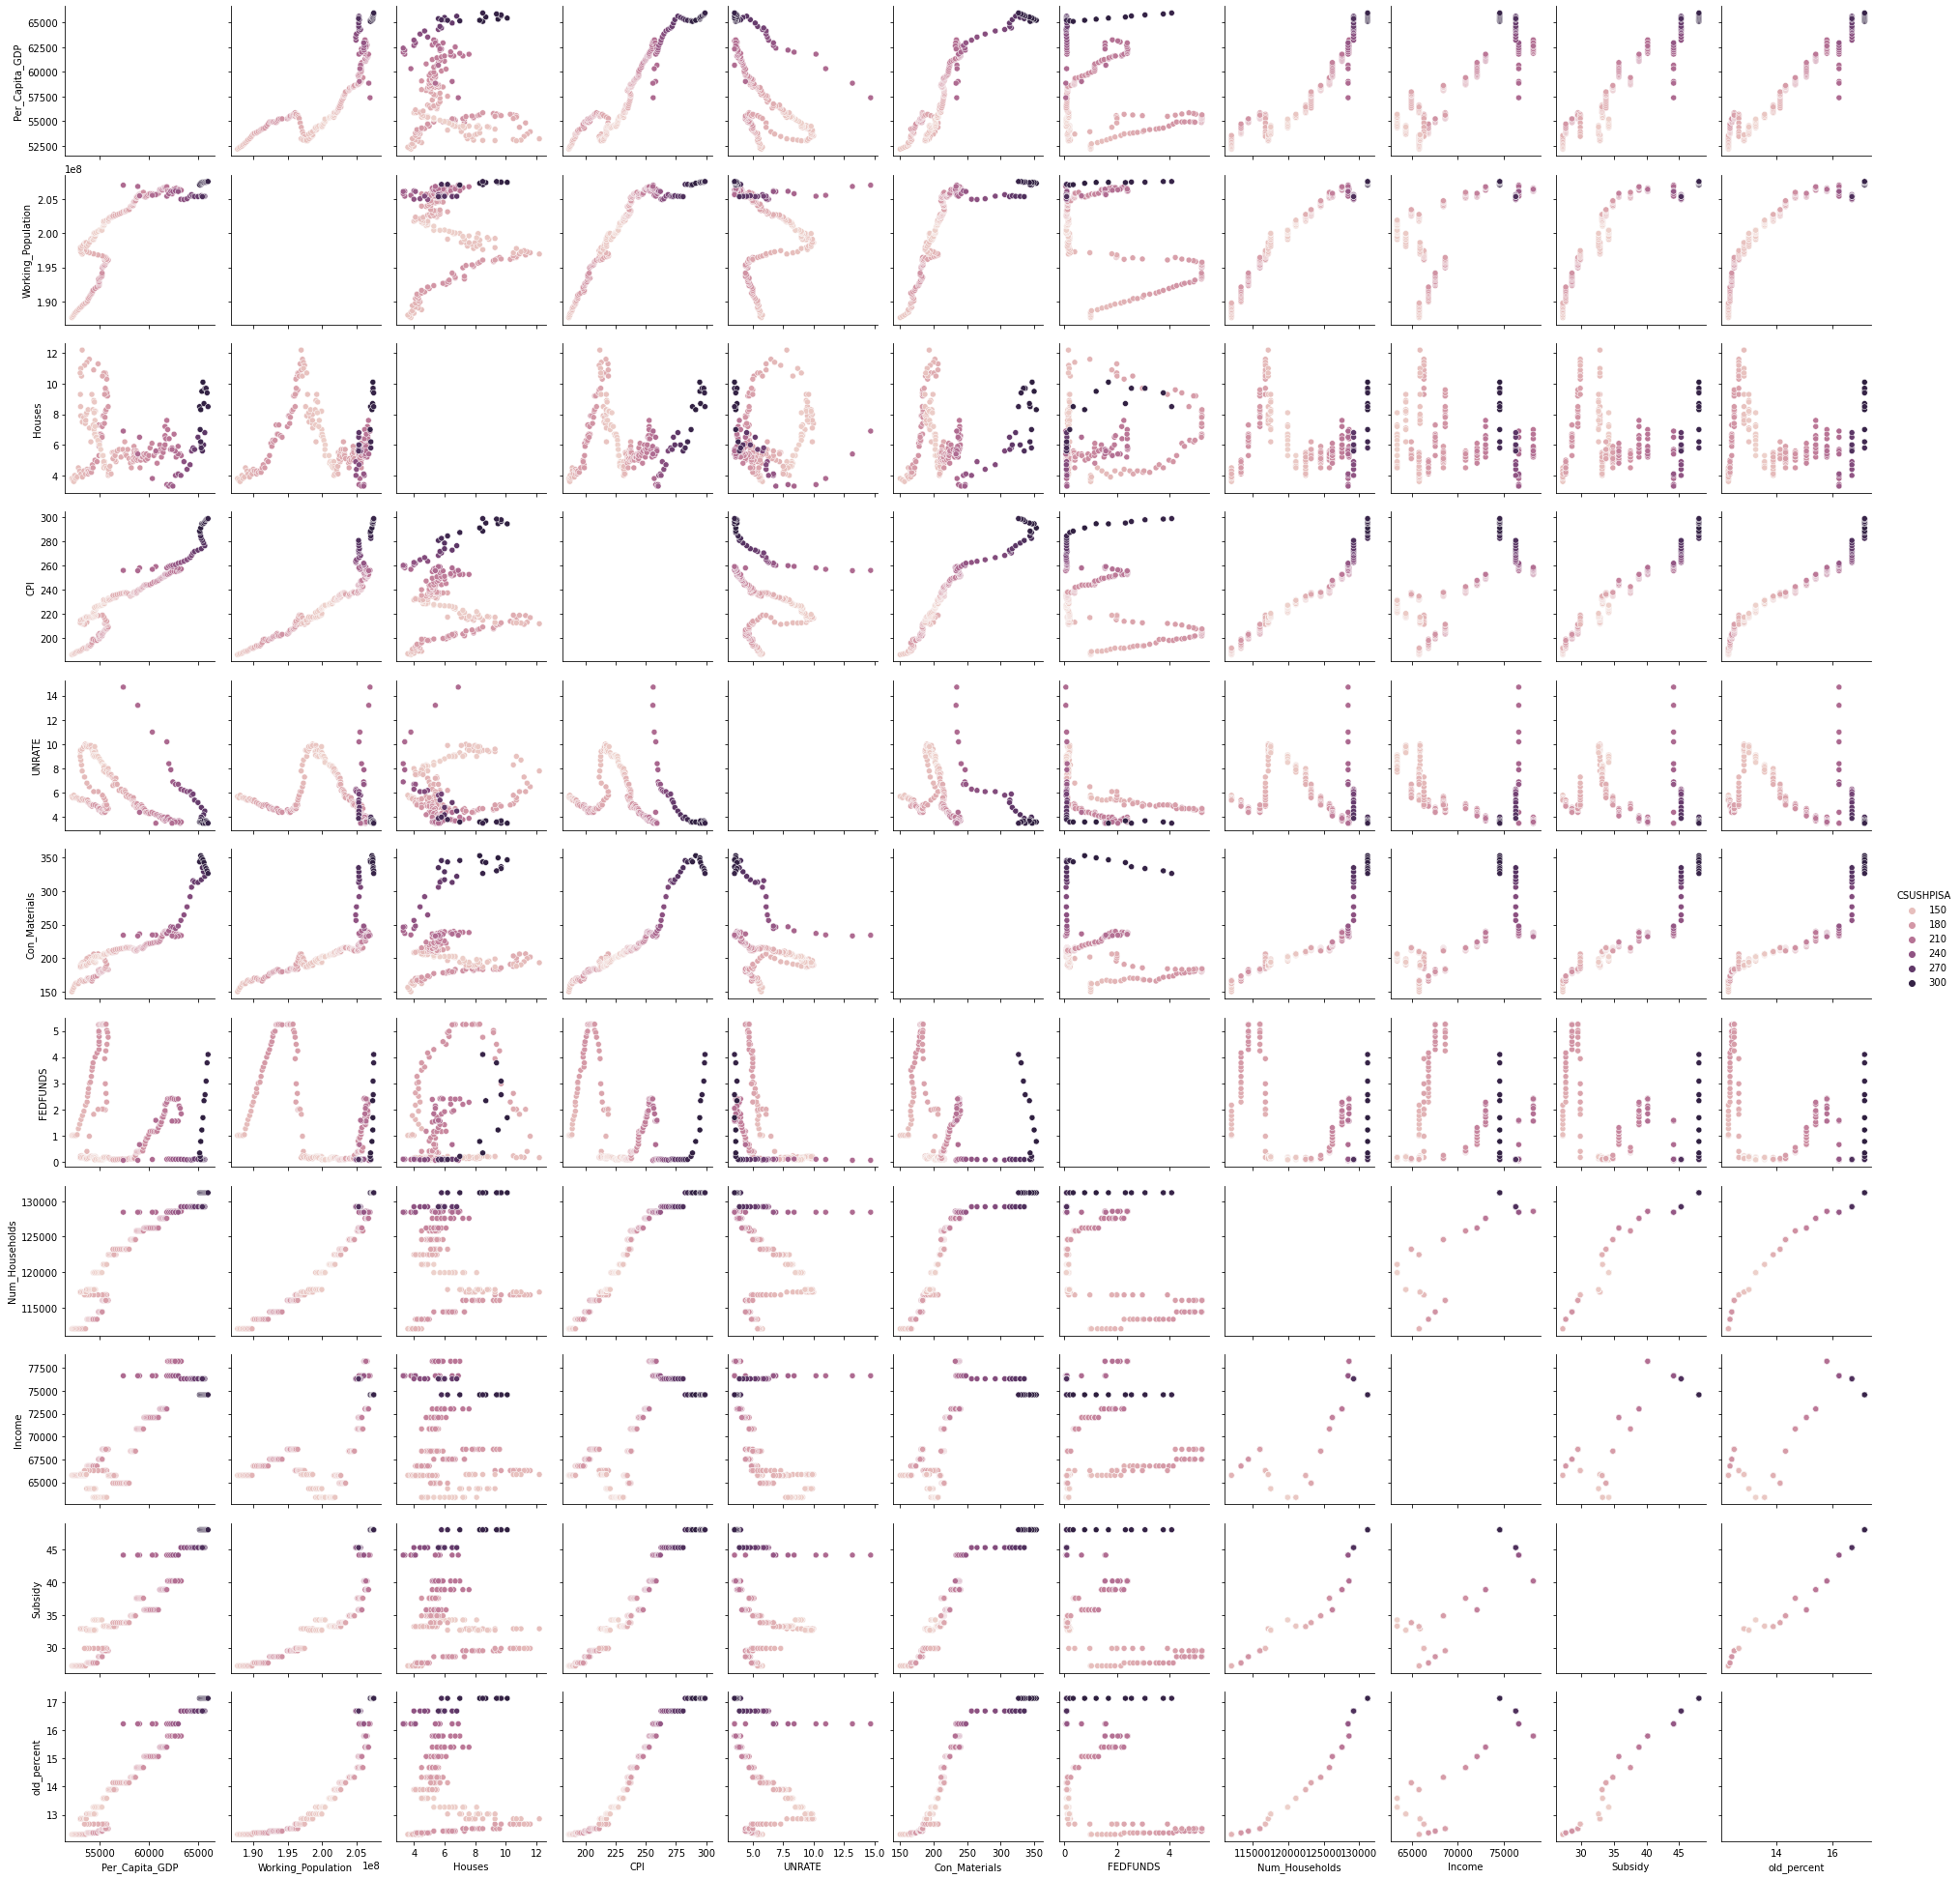

In [130]:
sns.pairplot(df, hue= 'CSUSHPISA')
plt.show()

# Checking for the outliers

In [131]:
df.columns

Index(['CSUSHPISA', 'Per_Capita_GDP', 'Working_Population', 'Houses', 'CPI',
       'UNRATE', 'Con_Materials', 'FEDFUNDS', 'Num_Households', 'Income',
       'Subsidy', 'old_percent'],
      dtype='object')

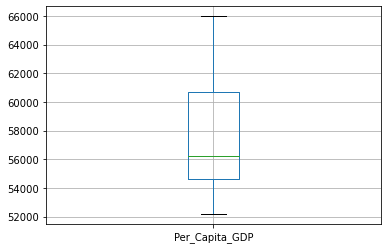

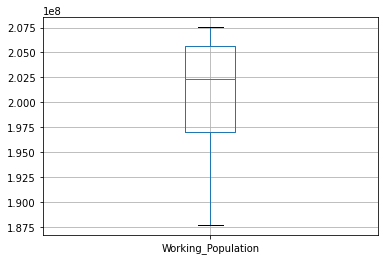

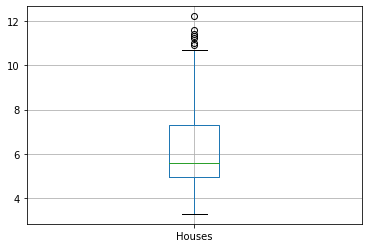

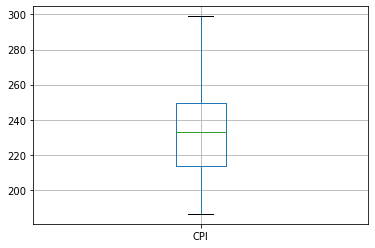

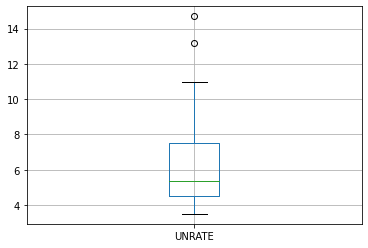

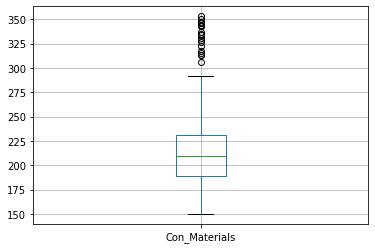

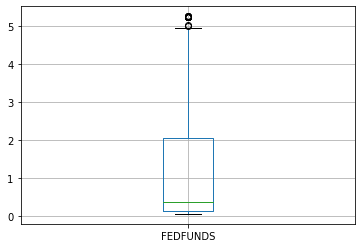

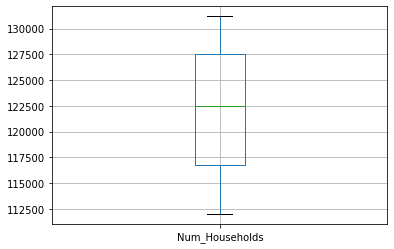

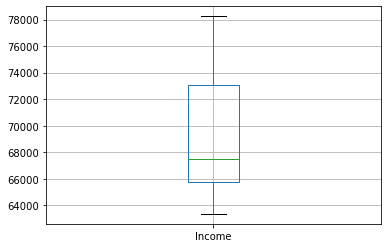

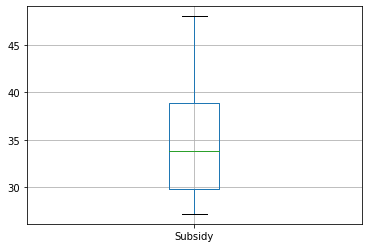

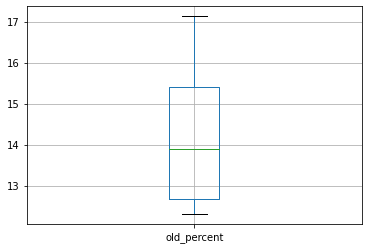

In [132]:
#checking for outliers by visualiztion 
col_list=['Per_Capita_GDP', 'Working_Population', 'Houses', 'CPI',
       'UNRATE', 'Con_Materials', 'FEDFUNDS', 'Num_Households', 'Income',
       'Subsidy', 'old_percent']
for col in col_list:
    df.boxplot(col)
    plt.show()

By visualizing with boxplot we can say that outliers are present in the dataset. column [Houses, UNRATE, CON_Material, FEDFUNDS ] have prescence of the outliers.

# Removing Outliers

In [133]:
#Removing outliers
from scipy.stats import zscore
col_list=df[['Houses', 'UNRATE', 'Con_Materials', 'FEDFUNDS']]
z=np.abs(zscore(col_list))

z

,Houses,UNRATE,Con_Materials,FEDFUNDS
DATE,,,,
2004-01-01,1.273758,0.150395,1.544905,0.192394
2004-01-02,1.325637,0.198420,1.465693,0.186204
2004-01-03,1.377515,0.102370,1.393470,0.192394
2004-01-04,1.170001,0.198420,1.309599,0.192394
2004-01-05,1.273758,0.198420,1.249025,0.192394
...,...,...,...,...
2022-01-08,1.268297,1.110901,2.945787,0.630942
2022-01-09,1.787084,1.206952,2.799268,0.773323
2022-01-10,1.787084,1.110901,2.737110,1.095229


In [134]:
threshold=3

print(np.where(z>3))

(array([ 60, 195, 196, 216, 218, 220, 221, 222], dtype=int64), array([0, 1, 1, 2, 2, 2, 2, 2], dtype=int64))


In [135]:
df_new=df[(z<3).all(axis=1)]

df_new


,CSUSHPISA,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Con_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
DATE,,,,,,,,,,,,
2004-01-01,141.646,52179.000000,187688839.5,3.8,186.300,5.7,150.000,1.00,112000,65760.0,27.201,12.304719
2004-01-02,143.192,52275.666667,187876003.0,3.7,186.700,5.6,153.400,1.01,112000,65760.0,27.201,12.304719
2004-01-03,145.059,52372.333333,188058175.6,3.6,187.100,5.8,156.500,1.00,112000,65760.0,27.201,12.304719
2004-01-04,146.593,52469.000000,188320660.9,4.0,187.400,5.6,160.100,1.00,112000,65760.0,27.201,12.304719
2004-01-05,148.186,52591.000000,188475226.1,3.8,188.200,5.6,162.700,1.00,112000,65760.0,27.201,12.304719
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-08,301.473,65569.000000,207370651.0,8.7,295.320,3.7,342.753,2.33,131202,74580.0,48.021,17.128121
2022-01-09,299.353,65676.000000,207453580.5,9.7,296.539,3.5,336.464,2.56,131202,74580.0,48.021,17.128121
2022-01-10,298.873,65783.000000,207431164.7,9.7,297.987,3.7,333.796,3.08,131202,74580.0,48.021,17.128121


In [136]:
df_new.shape

(220, 12)

In [137]:
df.shape

(228, 12)

In [138]:
#Checking dataloss
Dataloss = (((228-220)/228)*100)
Dataloss

3.508771929824561

The data loss is 3.50% which is less than 10% which is in range so we can further proceed.

In [139]:
df=df_new

In [140]:
df.shape

(220, 12)

# Check for prescence Skewness

In [141]:
df.skew()

CSUSHPISA             1.424784
Per_Capita_GDP        0.667457
Working_Population   -0.727320
Houses                1.016065
CPI                   0.340397
UNRATE                0.733283
Con_Materials         1.619798
FEDFUNDS              1.238985
Num_Households       -0.094570
Income                0.691706
Subsidy               0.710696
old_percent           0.535193
dtype: float64

Accpectable range is between -0.5 to +0.5 and here we can see that some columns have prescence of skewness.

In [142]:
#Removing skewness using cuberoot method
df['FEDFUNDS']=np.cbrt(df['FEDFUNDS'])
df['Subsidy']=np.cbrt(df['Subsidy'])
df['Income']=np.cbrt(df['Income'])
df['Con_Materials']=np.cbrt(df['Con_Materials'])
df['UNRATE']=np.cbrt(df['UNRATE'])
df['Houses']=np.cbrt(df['Houses'])
df['Working_Population']=np.cbrt(df['Working_Population'])

In [144]:
df.skew()

CSUSHPISA             1.424784
Per_Capita_GDP        0.667457
Working_Population   -0.751619
Houses                0.638196
CPI                   0.340397
UNRATE                0.489029
Con_Materials         1.223093
FEDFUNDS              0.513200
Num_Households       -0.094570
Income                0.643811
Subsidy               0.512009
old_percent           0.535193
dtype: float64

In [145]:
#Removing skewness using cuberoot method
df['FEDFUNDS']=np.cbrt(df['FEDFUNDS'])
df['Subsidy']=np.cbrt(df['Subsidy'])
df['Income']=np.cbrt(df['Income'])
df['Con_Materials']=np.cbrt(df['Con_Materials'])
df['UNRATE']=np.cbrt(df['UNRATE'])
df['Houses']=np.cbrt(df['Houses'])
df['Working_Population']=np.cbrt(df['Working_Population'])

In [146]:
df.skew()

CSUSHPISA             1.424784
Per_Capita_GDP        0.667457
Working_Population   -0.759773
Houses                0.507028
CPI                   0.340397
UNRATE                0.402464
Con_Materials         1.088563
FEDFUNDS              0.291389
Num_Households       -0.094570
Income                0.627788
Subsidy               0.445644
old_percent           0.535193
dtype: float64

Here we can see that we have eliminated the prescence of skewness to a certain accpectable limit.

# Correlation between target variable and independent variables

In [147]:
cor=df.corr()

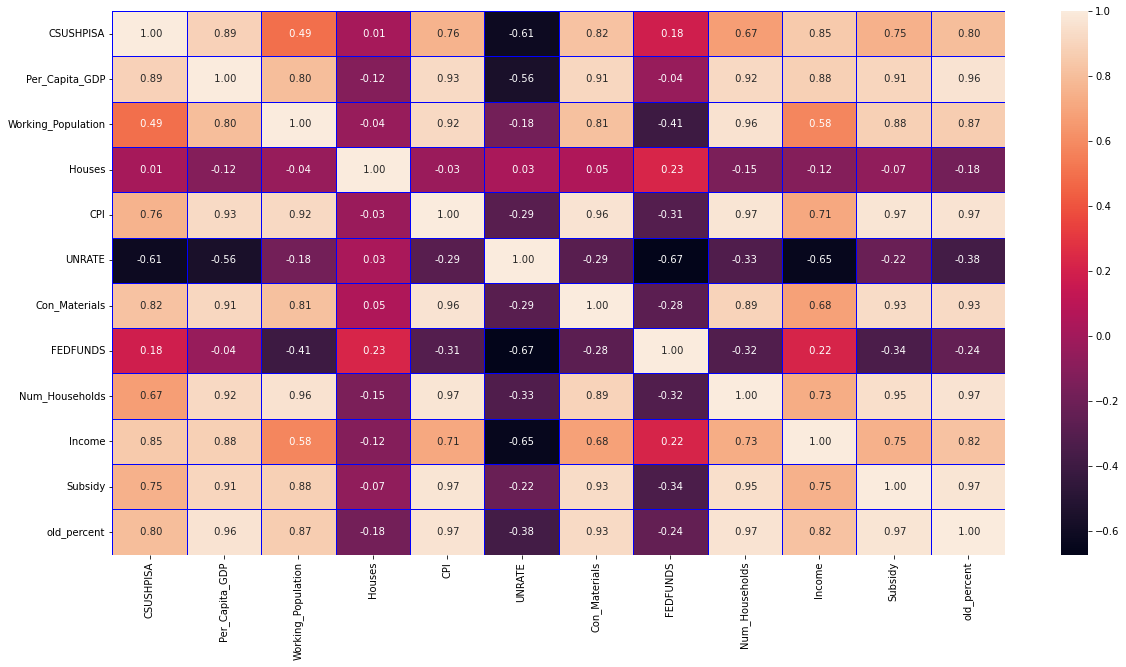

In [148]:
plt.figure(figsize=(20,10))

sns.heatmap(cor,annot= True,linewidths=1,linecolor='blue',fmt=' .2f' )
plt.show()

By using heatmap we can see that who the data is correlated with each other.

# Seprating features and label

In [149]:
x = df.drop(['CSUSHPISA'], axis=1)
y=df['CSUSHPISA']

In [150]:
x.shape

(220, 11)

In [151]:
y.shape

(220,)

# Feature Scalling Using Standard Scalarization

In [152]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Per_Capita_GDP,Working_Population,Houses,CPI,UNRATE,Con_Materials,FEDFUNDS,Num_Households,Income,Subsidy,old_percent
0,-1.454627,-2.406983,-1.530847,-1.805551,-0.015939,-1.994755,0.381255,-1.694503,-0.685705,-1.512194,-1.193645
1,-1.428446,-2.371045,-1.619224,-1.789399,-0.072587,-1.865155,0.388135,-1.694503,-0.685705,-1.512194,-1.193645
2,-1.402266,-2.336095,-1.709750,-1.773247,0.039832,-1.749196,0.381255,-1.694503,-0.685705,-1.512194,-1.193645
3,-1.376086,-2.285790,-1.360127,-1.761133,-0.072587,-1.617070,0.381255,-1.694503,-0.685705,-1.512194,-1.193645
4,-1.343044,-2.256197,-1.530847,-1.728828,-0.072587,-1.523278,0.381255,-1.694503,-0.685705,-1.512194,-1.193645
...,...,...,...,...,...,...,...,...,...,...,...
215,2.171813,1.208559,1.348707,2.596730,-1.367640,3.003541,0.994195,1.686469,1.247974,2.214366,2.123633
216,2.200792,1.223136,1.747021,2.645954,-1.536798,2.886430,1.066041,1.686469,1.247974,2.214366,2.123633
217,2.229771,1.219196,1.747021,2.704425,-1.367640,2.836158,1.209381,1.686469,1.247974,2.214366,2.123633
218,2.256403,1.235143,1.631516,2.729097,-1.451175,2.771059,1.371599,1.686469,1.247974,2.214366,2.123633


We have scaled the data using standard scalarization method to overcome the issue of biasness we have use standard scaler which will convert dataset into mean=0 and std= plus minius one 

Now we check for the multicolinearity for this we use Variance Inflation factor(VIF) method

# Checking for multicolinearity

In [153]:
# Find Varience Inflation Factor (VIF) in each scaled column above.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,70.124780,Per_Capita_GDP
1,87.654204,Working_Population
2,4.172645,Houses
3,150.463758,CPI
4,10.783360,UNRATE
5,51.413063,Con_Materials
6,8.541496,FEDFUNDS
7,277.575797,Num_Households
8,19.793667,Income
9,48.574232,Subsidy


If vif value is greater than 10 than we can say that multicolinearity is present in the dataset. Here we can see that column ['Num_Households' ,'old_percent','Subsidy', 'Con_Materials', 'CPI', 'Working_Population', 'Per_Capita_GDP' ] columns have vif value greater than 10.

To overcome this multicolinearity we need to remove the column with highest number of vif value and than again check for the prescence of the vif values untill the vif values for all the columns comes under the accpectable range.

In [154]:
# Drop column Num_Households

x.drop('Num_Households', axis = 1, inplace = True)

In [156]:
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,69.148551,Per_Capita_GDP
1,18.127548,Working_Population
2,3.924727,Houses
3,148.987650,CPI
4,8.436098,UNRATE
5,51.162844,Con_Materials
6,8.188265,FEDFUNDS
7,19.783587,Income
8,48.386098,Subsidy
9,136.598133,old_percent


In [157]:
x.drop('CPI', axis = 1, inplace = True)

In [158]:
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,68.706994,Per_Capita_GDP
1,9.804748,Working_Population
2,3.835242,Houses
3,8.194502,UNRATE
4,35.262529,Con_Materials
5,6.663013,FEDFUNDS
6,14.896527,Income
7,47.138574,Subsidy
8,97.705012,old_percent


In [159]:
x.drop('old_percent', axis = 1, inplace = True)

In [160]:
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,67.854814,Per_Capita_GDP
1,8.428573,Working_Population
2,2.384889,Houses
3,7.577003,UNRATE
4,30.920591,Con_Materials
5,6.567771,FEDFUNDS
6,13.277472,Income
7,27.305014,Subsidy


In [161]:
x.drop('Con_Materials', axis = 1, inplace = True)

In [162]:
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,26.637929,Per_Capita_GDP
1,5.729704,Working_Population
2,1.405413,Houses
3,7.573808,UNRATE
4,5.900949,FEDFUNDS
5,7.800363,Income
6,21.719189,Subsidy


In [163]:
x.drop('Subsidy', axis = 1, inplace = True)

In [164]:
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,13.706969,Per_Capita_GDP
1,5.165750,Working_Population
2,1.306837,Houses
3,5.533159,UNRATE
4,5.699231,FEDFUNDS
5,6.906745,Income


Here we can observe that vif value is appx. 10 so we can say that multicolinearity is removed from the dataset.

# Modeling

# Linear Regression

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Finding Best Random State

In [167]:
lr = LinearRegression()

for i in range(500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=0.30)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    train_r2_score = round(r2_score(y_train, pred_train) * 100, 1)
    test_r2_score = round(r2_score(y_test, pred_test) * 100, 1)
    
    if train_r2_score == test_r2_score:
        print("At Random state", i, "The model performs very well")
        print("At random State:", i)
        print("Training r2_score:", train_r2_score)
        print("Testing r2 score:", test_r2_score)


At Random state 0 The model performs very well
At random State: 0
Training r2_score: 94.2
Testing r2 score: 94.2
At Random state 24 The model performs very well
At random State: 24
Training r2_score: 94.2
Testing r2 score: 94.2
At Random state 44 The model performs very well
At random State: 44
Training r2_score: 94.1
Testing r2 score: 94.1
At Random state 78 The model performs very well
At random State: 78
Training r2_score: 94.2
Testing r2 score: 94.2
At Random state 83 The model performs very well
At random State: 83
Training r2_score: 94.2
Testing r2 score: 94.2
At Random state 157 The model performs very well
At random State: 157
Training r2_score: 94.2
Testing r2 score: 94.2
At Random state 173 The model performs very well
At random State: 173
Training r2_score: 94.2
Testing r2 score: 94.2
At Random state 218 The model performs very well
At random State: 218
Training r2_score: 94.0
Testing r2 score: 94.0
At Random state 221 The model performs very well
At random State: 221
Traini

We will selct "284" as our random state value because at random state 284 the r2 score is = 94.3 which is good 

In [190]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state= 284)

In [191]:
x_train.shape

(154, 6)

In [192]:
x_test.shape

(66, 6)

In [193]:
y_train.shape

(154,)

In [194]:
y_test.shape

(66,)

In [195]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)

print('Linear model accuracy is: ',r2_score(y_test,pred_test))

Linear model accuracy is:  0.942874691502357


Here we can see that our r2 score is near to 1 so we can say that the accuracy of our model is very good. 

In [196]:
lr.coef_

array([ 56.60563909, -26.05183257,   6.07876931,   3.20322846,
        -0.15589053,  -0.1490847 ])

In [197]:
lr.intercept_

180.78756419159188

In [198]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,pred_test)))

Error:
Mean Absolute Error: 6.639704951218267
Mean Squared Error: 70.01329268317522
Root Mean Square Error: 8.367394617392874


# Findings & Final conclusion

### After using liner regression we can clearly see that our model accuracy(r2 score) is 94% i shows that our model is perfroming very good. and we can select "LinearRegression" as our final model.

#### The numbers we use to predict home prices don't match up with what we'd expect. For instance, when unemployment goes up, our prediction says home prices should also go up, which doesn't really make sense. Usually, when more people are without jobs, home prices tend to go down.

 Since most things tend to go up over time, they usually have a high correlation. So, instead of relying on the complicated linear model, we can just look at scatter plots to see how different things affect home prices.

Here are a few things that i wanted to check and include in my dataset and research but didn't find suitable data from various sources but i strongly belive that this factors will also affect house prices. the factors are as follow :

1] Net-immigration: It was supposed to make home prices go up, but we couldn't find the right data. because with immigration in immigration house price also increase.

2] Average house size: I expected bigger houses to cost more, but even though homes got smaller after 2015, prices went up.

3] Land availability: I thought less land might mean higher prices, but we couldn't find the data we needed that can prove this.

4] Marriage Rate: I thought people buying homes after getting married and that might impact prices, but didn't find any data on this.

5] Number of active listings: We wanted to see if having more houses available meant lower prices, but we couldn't find data before 2017.

6] Tax Rate: Taxes can affect prices, but there were too many tax brackets, and we didn't have enough time to check them all.


In conclusion, the consideration of various factors and their direct exploration through scatter plots offers a more nuanced understanding, acknowledging the limitations of the linear model and highlighting the challenges posed by data availability and complexity.